<a href="https://colab.research.google.com/github/Zeytunzeynep/MLFlow/blob/main/ML_Project_Vol2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BU PROJE TAMMALANDIKTAN SONRAKİ NOTLAR(23.07.2025)

1. eksik değerleri yüzde şeklinde görmek daha iyi

2. pipeline yaparken hangi sütunlara uygulamak istediğini seç sadece veri tipiyle alakalı olmasın yoksa isim gibi object olup işe yaramayan şeylerde modeli eğitirken araya giriyor

3. eğitim verisinde y=hedef değişken yaptıktan sonra diğerlerini drop yap sonra X'e eşitle

4. test verisinde survived olmadığı için tam olarak modeli değerlendiremeyiz ama predict() yapabiliriz yani en son benim kodum da pred yapılan yerde aslında test verisinin X'i olmalı

5. Verinin dengeli şekilde modele verilmesi ve sonuçları neyin en çok etkilediğini hep göz önünde tut

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,1601,G6,S
freq,1,577,7,4,644


In [ ]:
train.isnull().mean()*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
train.shape

(891, 12)

In [ ]:
y=train['Survived']
X=train.drop(['Cabin','Survived','Ticket'],axis=1,inplace=True)

In [ ]:
train.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S


0=false, 1=true, and everything else = true

In [ ]:
train['Alone']=np.where((train['SibSp']+train['Parch'])>0,1,0)

In [ ]:
num_cols=train.select_dtypes(include=['int64','float64']).columns
cat_cols=train.select_dtypes(include=['object']).columns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
num_pipe=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),
    ('ss',StandardScaler())

])

In [ ]:
cat_pipe=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('one',OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor=ColumnTransformer(
    transformers=[
    ('num',num_pipe,num_cols),
    ('cat',cat_pipe,cat_cols)
])

In [ ]:
from xgboost import XGBClassifier

In [ ]:
full_pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',XGBClassifier())
])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(train,y,test_size=0.2,random_state=42)

In [ ]:
full_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Alone'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
pred=full_pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
y_prob = full_pipeline.predict_proba(X_test)[:,1]

In [ ]:
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

print(f"\nROC AUC Score: {auc:.3f}")


ROC AUC Score: 0.868


In [ ]:
test['Alone']=np.where((test['SibSp']+test['Parch'])>0,1,0)

In [ ]:
X_final_test = test.drop(['Cabin', 'Ticket'], axis=1)

In [ ]:
y_pred_test = full_pipeline.predict(X_final_test)

In [ ]:
results = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_pred_test
})

In [ ]:
train.describe(include='object')

,Name,Sex,Embarked
count,891,891,889
unique,891,2,3
top,"Dooley, Mr. Patrick",male,S
freq,1,577,644


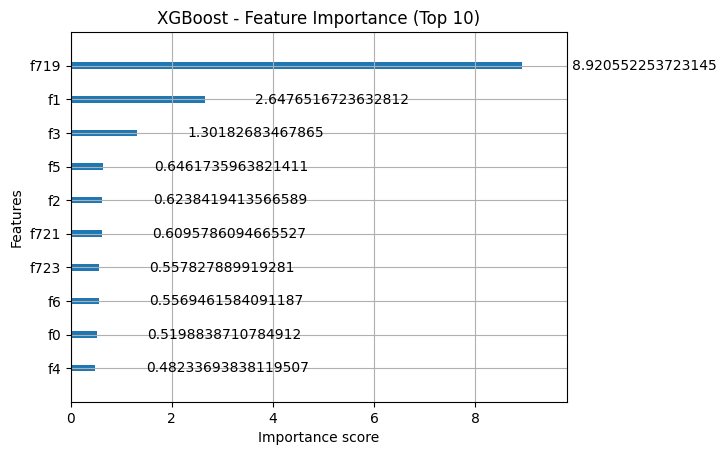

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Pipeline'dan eğitilmiş XGBClassifier'ı al
xgb_model = full_pipeline.named_steps['model']

# Özellik isimlerini al: OneHotEncoder'dan geçtiği için transformer's feature names'ine ulaşmamız gerek
# Ama basit haliyle sadece ilk haliyle göstermek yeterli

# Feature importance çizimi
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain')  # 'gain', 'weight', 'cover' seçenekleri var
plt.title("XGBoost - Feature Importance (Top 10)")
plt.show()


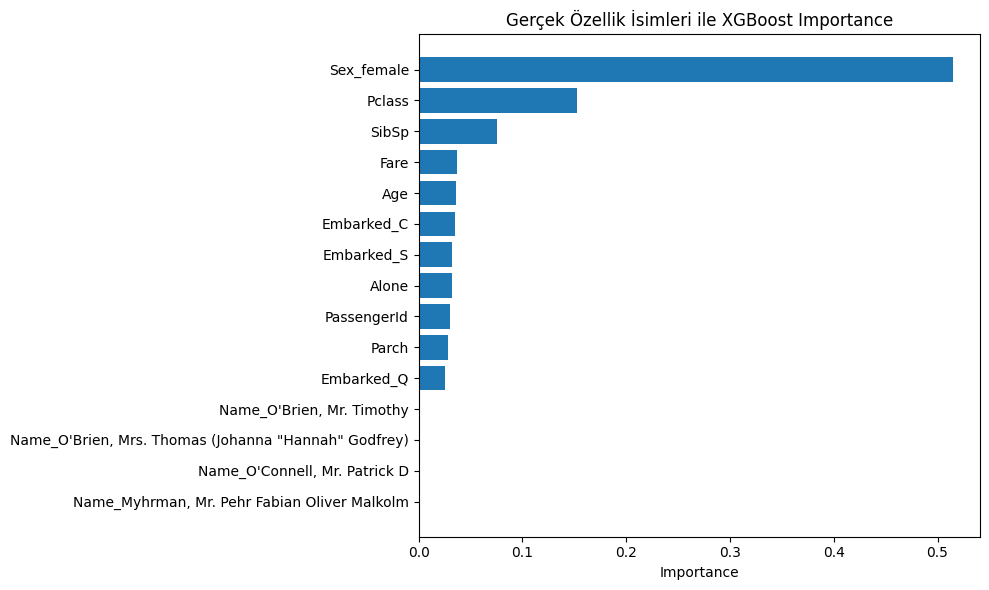

In [ ]:
# 1. Sayısal ve kategorik sütunları tanımladığını varsayıyorum:
# num_cols, cat_cols

# 2. OneHotEncoder'dan gelen sütun isimlerini al
cat_features = preprocessor.named_transformers_['cat'] \
    .named_steps['one'].get_feature_names_out(cat_cols)

# 3. Tüm özellik isimlerini birleştir (önce sayısal sonra kategorik)
all_features = list(num_cols) + list(cat_features)

# 4. Feature importance skorunu çıkar
importances = xgb_model.feature_importances_

# 5. DataFrame ile birleştir
import pandas as pd
fi_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 6. En önemli 15 özelliği çiz
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(fi_df['Feature'][:15][::-1], fi_df['Importance'][:15][::-1])
plt.title("Gerçek Özellik İsimleri ile XGBoost Importance")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()
